[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SeoulTechPSE/EngNm/blob/master/ch03_code.ipynb)

# Chpater 3: Symbolic computing

Creator: Robert Johansson, Updator: Kee-Youn Yoo

Code Listings for Numerical Python - A Practical Techniques Approach for Industry (ISBN 978-1-484205-54-9).    

In [1]:
# Rendering sympy equations requires MathJax to be available within each cell output. 
# The following is a function that will make this happen for Colab.

from IPython.display import Math, HTML
def enable_sympy_in_cell():
  display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', enable_sympy_in_cell)

## Importing sympy

In [2]:
import sympy
sympy.init_printing()
from sympy import I, pi, oo

## Symbols

In [3]:
x = sympy.Symbol("x")

In [4]:
y = sympy.Symbol("y", real=True)
y.is_real

True

In [5]:
x.is_real is None

True

In [6]:
print(x.is_real)

None


In [7]:
sympy.Symbol("z", imaginary=True).is_real

False

---

In [8]:
x = sympy.Symbol("x")
y = sympy.Symbol("y", negative=True)

In [9]:
sympy.sqrt(x**2)

In [10]:
sympy.sqrt(y**2)

In [11]:
n1 = sympy.Symbol("n")

In [12]:
n2 = sympy.Symbol("n", integer=True)

In [13]:
n3 = sympy.Symbol("n", odd=True)

In [14]:
sympy.cos(n1*pi)

In [15]:
sympy.cos(n2*pi)

In [16]:
sympy.cos(n3*pi)

---

In [17]:
a, b, c = sympy.symbols("a, b, c", negative=True)

In [18]:
d, e, f = sympy.symbols("d, e, f", positive=True)

## Numbers

We cannot directly use the built-in Python objects for integers, `int`, and floating-point numbers, `float`, and so on. Instead, Sympy provides the classes `sympy.Integer` and `sympy.Float` for representing integers and floating-point numbers within the Sympy
framework. This distinction is important to be aware of when working with Sympy, but fortunately we rarely
need to concern ourselves with creating objects of type `sympy.Integer` and `sympy.Float` to representing
specific numbers, since Sympy automatically promotes Python numbers to instances of these classes when
they occur in Sympy expressions.

In [19]:
i = sympy.Integer(18)

In [20]:
type(i)

sympy.core.numbers.Integer

In [21]:
i.is_Integer, i.is_real, i.is_odd

(True, True, False)

In [22]:
f = sympy.Float(2.3)

In [23]:
type(f)

sympy.core.numbers.Float

In [24]:
f.is_Integer, f.is_real, f.is_odd

(False, True, False)

In [25]:
i, f = sympy.sympify(19), sympy.sympify(2.3)

In [26]:
type(i), type(f)

(sympy.core.numbers.Integer, sympy.core.numbers.Float)

### Integer

While the `Symbol` with `integer=True` represents some integer, the Integer instance represents a
specific integer. For both cases, the `is_integer` attribute is `True`, but there is also an attribute `is_Integer`
(note the capital `I`), which is only True for Integer instances.

In [27]:
n = sympy.Symbol("n", integer=True)

In [28]:
n.is_integer, n.is_Integer, n.is_positive, n.is_Symbol

(True, False, None, True)

In [29]:
i = sympy.Integer(19)

In [30]:
i.is_integer, i.is_Integer, i.is_positive, i.is_Symbol

(True, True, True, False)

Integers in Sympy are **arbitrary precision**, meaning that they have no fixed lower and upper bounds,
which is the case when representing integers with a specific bit-size, as, for example, in Numpy.

In [31]:
i**50

In [32]:
sympy.factorial(100)

### Float

Like `Integer`, `Float` is **arbitrary precision**, in contrast to Python’s built-in `float` type and the `float` types in Numpy. This means that any `Float` can represent a `float` with arbitrary number of decimals. When a `Float` instance is created
using its constructor, there are two arguments: the first argument is a Python float or a string representing a
floating-point number, and the second (optional) argument is the precision (number of significant decimal
digits) of the `Float` object.

In [33]:
"%.25f" % 0.3  # create a string representation with 25 decimals

'0.2999999999999999888977698'

In [34]:
sympy.Float(0.3, 25)

In [35]:
sympy.Float('0.3', 25)

### Rational

In [36]:
sympy.Rational(11, 13)

In [37]:
r1 = sympy.Rational(2, 3)

In [38]:
r2 = sympy.Rational(4, 5)

In [39]:
r1 * r2

In [40]:
r1 / r2

### Constants and special symbols

In [41]:
[sympy.pi, sympy.E, sympy.EulerGamma, sympy.I, sympy.oo]

### Functions

In [42]:
x, y, z = sympy.symbols("x, y, z")

In [43]:
f = sympy.Function("f")

In [44]:
type(f)

sympy.core.function.UndefinedFunction

In [45]:
f(x)

In [46]:
g = sympy.Function("g")(x, y, z)

In [47]:
g

In [48]:
g.free_symbols

---

In [49]:
sympy.sin

sin

In [50]:
sympy.sin(x)

In [51]:
sympy.sin(pi * 1.5)

In [52]:
n = sympy.Symbol("n", integer=True)

In [53]:
sympy.sin(pi * n)

In [54]:
h = sympy.Lambda(x, x**2); h

In [55]:
h(5)

In [56]:
h(1 + x)

## Expressions

In [57]:
x = sympy.Symbol("x")

In [58]:
expr = 1 +2*x**2 +3*x**3; expr

In [59]:
expr.args

In [60]:
expr.args[1]

In [61]:
expr.args[1].args

In [62]:
expr.args[1].args[1]

In [63]:
expr.args[1].args[1].args

In [64]:
expr.args[1].args[1].args[1]

In [65]:
expr.args[1].args[1].args[1].args

## Manipulating expressions

### Simlification

In [66]:
expr = 2 * (x**2 - x) - x * (x + 1); expr

In [67]:
sympy.simplify(expr)

In [68]:
expr.simplify()

In [69]:
expr

---

In [70]:
expr = 2 * sympy.cos(x) * sympy.sin(x); expr

In [71]:
sympy.simplify(expr)

In [72]:
expr = sympy.exp(x) * sympy.exp(y); expr

In [73]:
sympy.simplify(expr)

### Expand

In [74]:
expr = (x + 1) * (x + 2)

In [75]:
sympy.expand(expr)

In [76]:
sympy.sin(x + y).expand(trig=True)

In [77]:
a, b = sympy.symbols("a, b", positive=True)

In [78]:
sympy.log(a * b).expand(log=True)

In [79]:
sympy.exp(I*a + b).expand(complex=True)

In [80]:
sympy.expand((a * b)**x, power_base=True)

In [81]:
sympy.exp(I*(a-b)*x).expand(power_exp=True)

### Factor, collect and combine

In [82]:
sympy.factor(x**2 - 1)

In [83]:
sympy.factor(x * sympy.cos(y) + sympy.sin(z) * x)

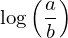

In [84]:
sympy.logcombine(sympy.log(a) - sympy.log(b))

In [85]:
expr = x + y + x * y * z

In [86]:
expr.collect(x)

In [87]:
expr.collect(y)

In [88]:
expr = sympy.cos(x + y) + sympy.sin(x - y)

In [89]:
expr1 = expr.expand(trig=True); expr1

In [90]:
expr2 = expr1.collect([sympy.cos(x), sympy.sin(x)]); expr2

In [91]:
expr3 = expr2.collect(sympy.cos(y) - sympy.sin(y)); expr3

### Apart, together, and cancel

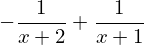

In [92]:
sympy.apart(1/(x**2 + 3*x + 2), x)

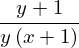

In [93]:
sympy.together(1 / (y * x + y) + 1 / (1+x))

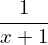

In [94]:
sympy.cancel(y / (y * x + y))

### Substitutions

In [95]:
(x + y).subs(x, y)

In [96]:
sympy.sin(x * sympy.exp(x)).subs(x, y)

In [97]:
sympy.sin(x * z).subs({z: sympy.exp(y), x: y, sympy.sin: sympy.cos})

In [98]:
expr = x * y + z**2 *x

In [99]:
values = {x: 1.25, y: 0.4, z: 3.2}

In [100]:
expr.subs(values)

## Numerical evaluation

In [101]:
sympy.N(1 + pi)

In [102]:
sympy.N(pi, 50)

In [103]:
(x + 1/pi).evalf(10)

---

In [104]:
expr = sympy.sin(pi * x * sympy.exp(x))

In [105]:
[expr.subs(x, xx).evalf(3) for xx in range(0, 10)]  # rather slow

In [106]:
expr_func = sympy.lambdify(x, expr)

In [107]:
expr_func(1.0)

In [108]:
expr_func = sympy.lambdify(x, expr, 'numpy')

In [109]:
import numpy as np

In [110]:
xvalues = np.arange(0, 10)

In [111]:
expr_func(xvalues)  # efficient method

array([ 0.        ,  0.77394269,  0.64198244,  0.72163867,  0.94361635,
        0.20523391,  0.97398794,  0.97734066, -0.87034418, -0.69512687])

## Calculus

### Derivatives

In [112]:
f = sympy.Function('f')(x)

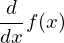

In [113]:
sympy.diff(f, x) # equivalent to f.diff(x)

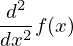

In [114]:
sympy.diff(f, x, x)

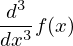

In [115]:
sympy.diff(f, x, 3) # equivalent to sympy.diff(f, x, x, x)

In [116]:
g = sympy.Function('g')(x, y)

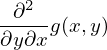

In [117]:
g.diff(x, y) # equivalent to sympy.diff(g, x, y)

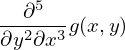

In [118]:
g.diff(x, 3, y, 2) # equivalent to sympy.diff(g, x, x, x, y, y)

---

In [119]:
expr = x**4 + x**3 + x**2 + x + 1

In [120]:
expr.diff(x)

In [121]:
expr.diff(x, x)

In [122]:
expr = (x + 1)**3 * y ** 2 * (z - 1)

In [123]:
expr.diff(x, y, z)

---

In [124]:
expr = sympy.sin(x * y) * sympy.cos(x / 2)

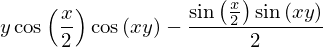

In [125]:
expr.diff(x)

In [126]:
expr = sympy.special.polynomials.hermite(x, 0)

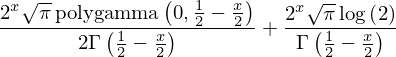

In [127]:
expr.diff(x).doit()

---

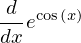

In [128]:
d = sympy.Derivative(sympy.exp(sympy.cos(x)), x); d

In [129]:
d.doit()

### Integals

In [130]:
a, b, x, y = sympy.symbols("a, b, x, y")

In [131]:
f = sympy.Function("f")(x)

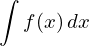

In [132]:
sympy.integrate(f)

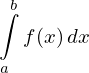

In [133]:
sympy.integrate(f, (x, a, b))

---

In [134]:
sympy.integrate(sympy.sin(x))

In [135]:
sympy.integrate(sympy.sin(x), (x, a, b))

---

In [136]:
sympy.integrate(sympy.exp(-x**2), (x, 0, oo))

In [137]:
a, b, c = sympy.symbols("a, b, c", positive=True)

In [138]:
sympy.integrate(a * sympy.exp(-((x-b)/c)**2), (x, -oo, oo))

---

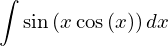

In [139]:
sympy.integrate(sympy.sin(x * sympy.cos(x)))

---

In [140]:
expr = sympy.sin(x*sympy.exp(y))

In [141]:
sympy.integrate(expr, x)

In [142]:
expr = (x + y)**2

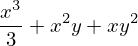

In [143]:
sympy.integrate(expr, x)

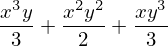

In [144]:
sympy.integrate(expr, x, y)

In [145]:
sympy.integrate(expr, (x, 0, 1), (y, 0, 1))

### Series

In [146]:
 sympy.limit(sympy.sin(x) / x, x, 0)

In [147]:
f = sympy.Function('f')

In [148]:
x, h = sympy.symbols("x, h")
diff_limit = (f(x + h) - f(x))/h

In [149]:
sympy.limit(diff_limit.subs(f, sympy.cos), h, 0)

In [150]:
sympy.limit(diff_limit.subs(f, sympy.sin), h, 0)

In [151]:
expr = (x**2 - 3*x) / (2*x - 2)

In [152]:
p = sympy.limit(expr/x, x, sympy.oo)

In [153]:
q = sympy.limit(expr - p*x, x, sympy.oo)

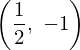

In [154]:
p, q

### Sums and products

In [155]:
n = sympy.symbols("n", integer=True)

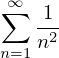

In [156]:
x = sympy.Sum(1/(n**2), (n, 1, oo)); x

In [157]:
x.doit()

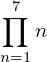

In [158]:
x = sympy.Product(n, (n, 1, 7)); x

In [159]:
x.doit()

In [160]:
x = sympy.Symbol("x")

In [161]:
sympy.Sum((x)**n/(sympy.factorial(n)), (n, 1, oo)).doit().simplify()

## Equations

In [162]:
x = sympy.Symbol("x")

In [163]:
sympy.solve(x**2 + 2*x - 3)

In [164]:
a, b, c = sympy.symbols("a, b, c")

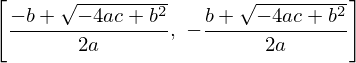

In [165]:
sympy.solve(a * x**2 + b * x + c, x)

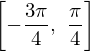

In [166]:
sympy.solve(sympy.sin(x) - sympy.cos(x), x)

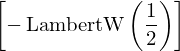

In [167]:
sympy.solve(sympy.exp(x) + 2 * x, x)

In [168]:
sympy.solve(x**5 - x**2 + 1, x)

In [169]:
sympy.solve(sympy.tan(x) + x, x)

NotImplementedError: multiple generators [x, tan(x)]
No algorithms are implemented to solve equation x + tan(x)

---

In [ ]:
eq1 = x + 2 * y - 1
eq2 = x - y + 1

In [ ]:
sympy.solve([eq1, eq2], [x, y], dict=True)

In [ ]:
eq1 = x**2 - y
eq2 = y**2 - x

In [ ]:
sols = sympy.solve([eq1, eq2], [x, y], dict=True); sols

In [ ]:
[eq1.subs(sol).simplify() == 0 and eq2.subs(sol).simplify() == 0 for sol in sols]

## Linear algebra

In [ ]:
sympy.Matrix([1,2])

In [ ]:
sympy.Matrix([[1,2]])

In [ ]:
sympy.Matrix([[1, 2], [3, 4]])

In [ ]:
sympy.Matrix(3, 4, lambda m, n: 10 * m + n)

In [ ]:
a, b, c, d = sympy.symbols("a, b, c, d")

In [ ]:
M = sympy.Matrix([[a, b], [c, d]]); M

In [ ]:
M * M  # Matrix multiplication

In [ ]:
x = sympy.Matrix(sympy.symbols("x_1, x_2"))

In [ ]:
M * x

---

In [ ]:
p, q = sympy.symbols("p, q")

In [ ]:
M = sympy.Matrix([[1, p], [q, 1]]); M

In [ ]:
b = sympy.Matrix(sympy.symbols("b_1, b_2")); b

In [ ]:
x = M.LUsolve(b); x

In [ ]:
x = M.inv() * b; x

## Versions

In [ ]:
print("numpy: ", np.__version__)
print("sympy: ", sympy.__version__)